<a href="https://colab.research.google.com/github/chirudukuru/cvd-Covid19/blob/main/CVD_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascularcovid.csv to cardiovascularcovid.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cardiovascularcovid.csv']))

In [4]:
df

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,1,59,1,1,36.2,1,1,1,95,80,16,1,0,95,21,120,70,0,0,1
1,2,52,1,1,37.8,0,0,0,99,115,18,3,1,99,24,70,40,1,4,1
2,3,58,1,0,37.5,1,0,0,94,82,16,1,0,94,21,110,70,1,0,1
3,4,55,1,1,39.5,1,0,0,96,89,18,2,1,96,21,110,80,1,1,1
4,5,40,1,1,38.0,1,1,0,98,90,15,2,0,98,21,115,70,0,0,1
5,6,49,1,1,38.1,1,0,0,93,100,22,3,1,93,35,120,70,1,6,1
6,7,44,1,0,36.7,0,0,0,98,78,18,1,0,98,21,135,90,0,0,1
7,8,51,1,1,39.4,1,0,1,96,124,24,3,0,96,21,130,75,1,0,1
8,9,58,1,1,35.5,1,0,0,95,117,43,3,1,95,60,177,80,0,1,3
9,10,67,1,1,37.8,1,0,0,90,90,16,2,0,90,21,141,74,0,0,1


In [38]:
df.keys()

Index(['Case', 'Age', 'Smoking ', 'COVID-19', 'Temperature ', 'Cough',
       'Headache', 'Sore throat', 'Oxigen saturation (%)', 'Heartrateminute',
       'Respiratory ratw (breaths minute)', 'Critical status', 'ICU',
       'Oxigen  (%)', 'Frac oxygen  (%)', 'Systolic b.p (mmHg) ',
       'Diastolic b.p (mmHg)', 'Bilateral pulmonary ',
       'Length of ICU stay (days)', 'Outcome'],
      dtype='object')

In [39]:
print(df['Heartrateminute'])

0      80
1     115
2      82
3      89
4      90
5     100
6      78
7     124
8     117
9      90
10     66
11     74
12    113
13     71
14     87
15     90
16     69
17    112
18     96
19    102
20     90
21     77
22     72
23    100
24    110
25     96
26    101
27    100
28     98
29    124
30    108
31     97
32    115
33     95
34     92
35     80
36     97
37     78
38     84
39     73
40     68
41     76
42    106
43     75
44     68
45     71
46     90
47     68
48     70
49     65
50     95
Name: Heartrateminute, dtype: int64


In [40]:
df['Outcome']


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     3
9     1
10    1
11    1
12    1
13    1
14    1
15    3
16    1
17    1
18    3
19    1
20    1
21    1
22    1
23    2
24    3
25    1
26    1
27    2
28    3
29    1
30    1
31    1
32    1
33    1
34    2
35    1
36    1
37    3
38    2
39    1
40    1
41    3
42    1
43    1
44    1
45    3
46    1
47    1
48    1
49    1
50    2
Name: Outcome, dtype: int64

In [41]:
df_feat = pd.DataFrame(df['Heartrateminute'],columns=df['Outcome'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       0 non-null      object
 1   1       0 non-null      object
 2   1       0 non-null      object
 3   1       0 non-null      object
 4   1       0 non-null      object
 5   1       0 non-null      object
 6   1       0 non-null      object
 7   1       0 non-null      object
 8   3       0 non-null      object
 9   1       0 non-null      object
 10  1       0 non-null      object
 11  1       0 non-null      object
 12  1       0 non-null      object
 13  1       0 non-null      object
 14  1       0 non-null      object
 15  3       0 non-null      object
 16  1       0 non-null      object
 17  1       0 non-null      object
 18  3       0 non-null      object
 19  1       0 non-null      object
 20  1       0 non-null      object
 21  1       0 non-null      object
 22  1       0 non-null      object
 23  2      

In [42]:
df['Outcome']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     3
9     1
10    1
11    1
12    1
13    1
14    1
15    3
16    1
17    1
18    3
19    1
20    1
21    1
22    1
23    2
24    3
25    1
26    1
27    2
28    3
29    1
30    1
31    1
32    1
33    1
34    2
35    1
36    1
37    3
38    2
39    1
40    1
41    3
42    1
43    1
44    1
45    3
46    1
47    1
48    1
49    1
50    2
Name: Outcome, dtype: int64

In [44]:
df_target = pd.DataFrame(df['Outcome'],columns=['COVID-19'])

In [45]:
df.head()

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,1,59,1,1,36.2,1,1,1,95,80,16,1,0,95,21,120,70,0,0,1
1,2,52,1,1,37.8,0,0,0,99,115,18,3,1,99,24,70,40,1,4,1
2,3,58,1,0,37.5,1,0,0,94,82,16,1,0,94,21,110,70,1,0,1
3,4,55,1,1,39.5,1,0,0,96,89,18,2,1,96,21,110,80,1,1,1
4,5,40,1,1,38.0,1,1,0,98,90,15,2,0,98,21,115,70,0,0,1


In [51]:
from sklearn.svm import SVC

In [52]:
model = SVC()

In [53]:
# Import numpy, pandas, matplotlib, seaborn, SVC, and confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [56]:
# plot data
sns.scatterplot(data=df, x='Age',y='Heartrateminute')

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

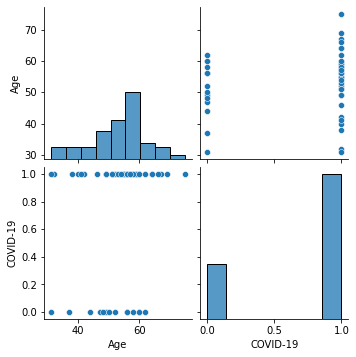

In [63]:
sns.pairplot(df, vars = ['Age', 'COVID-19', ])

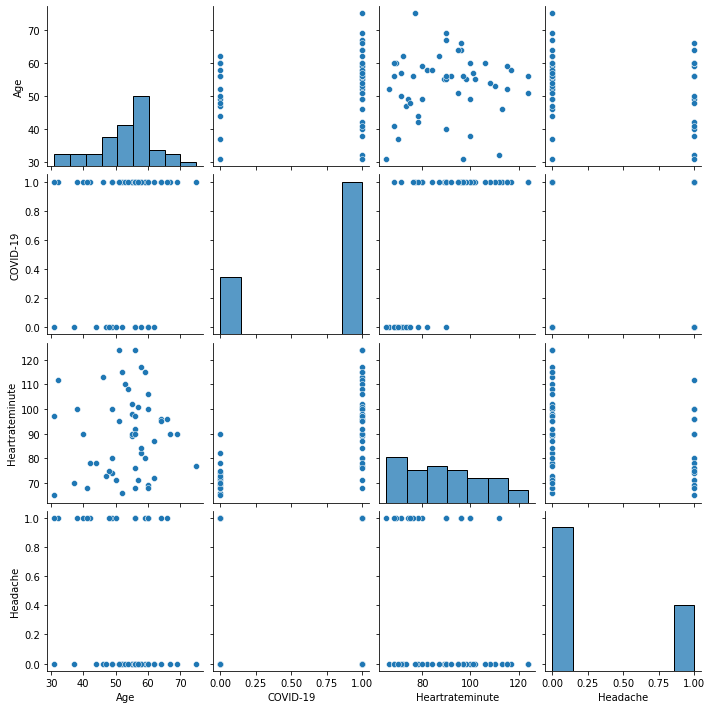

In [65]:
sns.pairplot(df, vars = ['Age', 'COVID-19','Heartrateminute','Headache'])

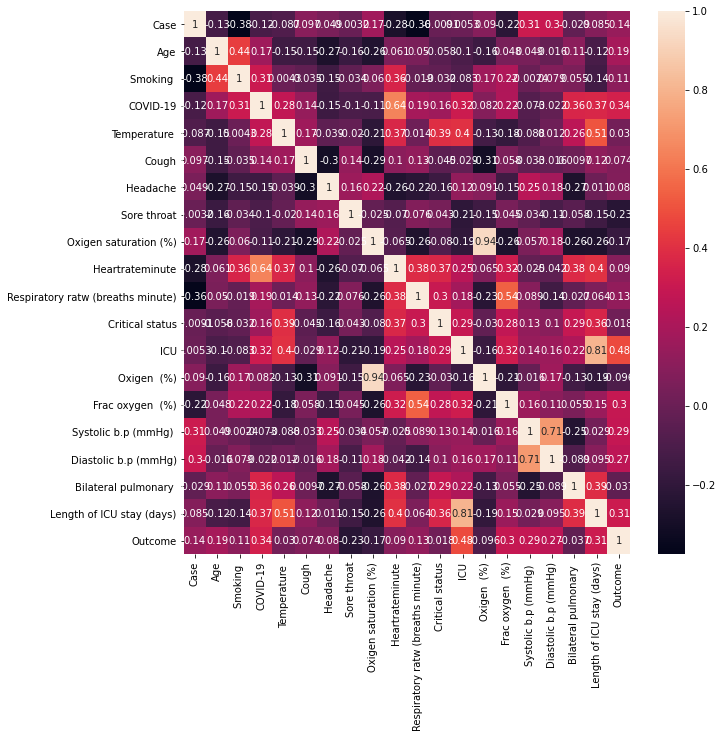

In [67]:

plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True)